In [ ]:
import cv2 # digital image processing (OpenCV)
from matplotlib import pyplot as plt

In [ ]:
cv2.__version__

'4.10.0'

In [ ]:
img = cv2.imread("/content/sample_data/GambarLena.png")

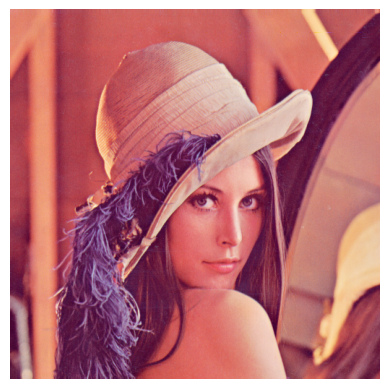

In [ ]:
plot_image(img)

In [ ]:
img.shape

(512, 512, 3)

In [ ]:
print(img)

[[[125 137 226]
  [125 137 226]
  [133 137 223]
  ...
  [122 148 230]
  [110 130 221]
  [ 90  99 200]]

 [[125 137 226]
  [125 137 226]
  [133 137 223]
  ...
  [122 148 230]
  [110 130 221]
  [ 90  99 200]]

 [[125 137 226]
  [125 137 226]
  [133 137 223]
  ...
  [122 148 230]
  [110 130 221]
  [ 90  99 200]]

 ...

 [[ 60  18  84]
  [ 60  18  84]
  [ 58  27  92]
  ...
  [ 84  73 173]
  [ 76  68 172]
  [ 79  62 177]]

 [[ 57  22  82]
  [ 57  22  82]
  [ 62  32  96]
  ...
  [ 79  70 179]
  [ 81  71 181]
  [ 81  74 185]]

 [[ 57  22  82]
  [ 57  22  82]
  [ 62  32  96]
  ...
  [ 79  70 179]
  [ 81  71 181]
  [ 81  74 185]]]


In [ ]:
def plot_image(img, title=None, font_size=None, axis="off", color=cv2.COLOR_BGR2RGB): # since CV2 uses BGR image, convert BGR to RGB
    plt.title(title, fontsize=font_size) # plot figure name/title
    plt.axis(axis) # "off" == remove pyplot axes

    """
    You DO NOT NEED the if-else configuration below IF you're using OPENCV v4.0. or above.
    Simply do plt.imshow(cv2.cvtColor(img, color)) for either BGR or grayscale image.
    """

    if len(img.shape) == 3: # means it has 3-channels color
        plt.imshow(cv2.cvtColor(img, color))
    else: # for 1-channel image
        plt.imshow(img, cmap="gray")

In [ ]:
img_grayscaled = cv2.imread("/content/sample_data/GambarLena.png", cv2.IMREAD_GRAYSCALE)

In [ ]:
print(img_grayscaled)

[[169 169 168 ... 175 162 138]
 [169 169 168 ... 175 162 138]
 [169 169 168 ... 175 162 138]
 ...
 [ 53  53  59 ... 115 112 114]
 [ 53  53  64 ... 117 118 122]
 [ 53  53  64 ... 117 118 122]]


In [ ]:
_, img_binary = cv2.threshold(img_grayscaled, 127, 255, cv2.THRESH_BINARY)

In [ ]:
print(img_binary)

[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]


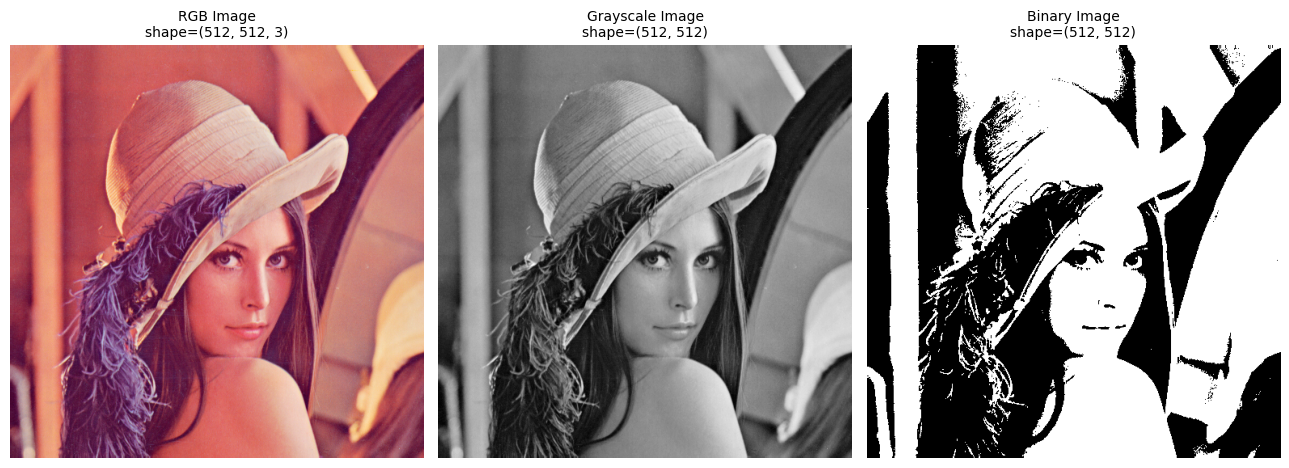

In [ ]:
origin_fig_names = [
    "RGB Image\nshape={}".format(img.shape),
    "Grayscale Image\nshape={}".format(img_grayscaled.shape),
    "Binary Image\nshape={}".format(img_binary.shape)
] # will be set as title for each image

origin_fig = plt.figure(figsize=(13, 5)) # figsize(width/horizontally, height/vertically)
origin_img = [img, img_grayscaled, img_binary]

for i in range(len(origin_img)):
    x = origin_fig.add_subplot(1, 3, i+1) # position index always starts from 1, thus i+1
    plot_image(origin_img[i], title=origin_fig_names[i])
plt.tight_layout() # margin adjusted

In [ ]:
cv2.imwrite("/content/sample_data/GambarLenaGrayscale.png", img_grayscaled)

True

In [ ]:
# Equalization vs. CLAHE
equalized_img = cv2.equalizeHist(img_grayscaled)
clahe_img = cv2.createCLAHE(clipLimit=3, tileGridSize=(15,15)).apply(img_grayscaled)

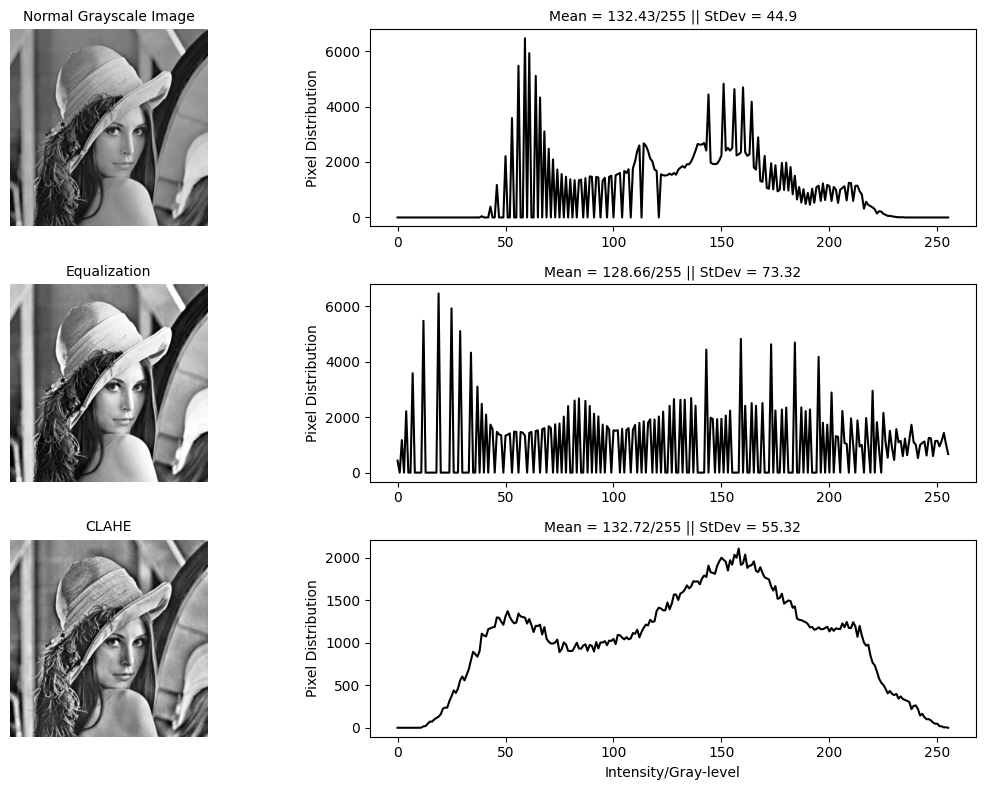

In [ ]:
equ_names = ["Normal Grayscale Image", "Equalization", "CLAHE"]
equ_img = [
    img_grayscaled, create_hist(img_grayscaled),
    equalized_img, create_hist(equalized_img),
    clahe_img, create_hist(clahe_img)]

equ_fig = plt.figure(figsize=(12, 8)) # figsize(width/horizontally, height/vertically)
for i in range(len(equ_img)):
    e = equ_fig.add_subplot(3, 2, i+1) # position index always starts from 1, thus i+1
    if i % 2 == 0:
        plot_image(equ_img[i], title=equ_names[int(i/2)])
    else:
        plt.plot(equ_img[i], color="k")
        plt.title("Mean = {}/255 || StDev = {}".format(
            round(cv2.meanStdDev(equ_img[int(i-1)])[0][0][0], 2), # the mean
            round(cv2.meanStdDev(equ_img[int(i-1)])[1][0][0], 2) # the standard deviation
            ), fontsize=10
        )
        if i == 5: # print x-label only in the last histogram plot
            plt.xlabel("Intensity/Gray-level")
        plt.ylabel("Pixel Distribution") # print y-label in all histogram plots
plt.tight_layout()

In [ ]:
def create_hist(image, channel=0):
    return cv2.calcHist(images=[image], channels=[0], mask=None, histSize=[256], ranges=[0, 256])

In [ ]:
img_grayscaled_low_brightness = cv2.subtract(img_grayscaled, 50)
img_grayscaled_high_brightness = cv2.add(img_grayscaled, 50)

In [ ]:
histname = ["Normal Brightness", "Low Brightness", "High Brightness"]

grayhist_img = [
    img_grayscaled, create_hist(img_grayscaled),
    img_grayscaled_low_brightness, create_hist(img_grayscaled_low_brightness),
    img_grayscaled_high_brightness, create_hist(img_grayscaled_high_brightness)
]

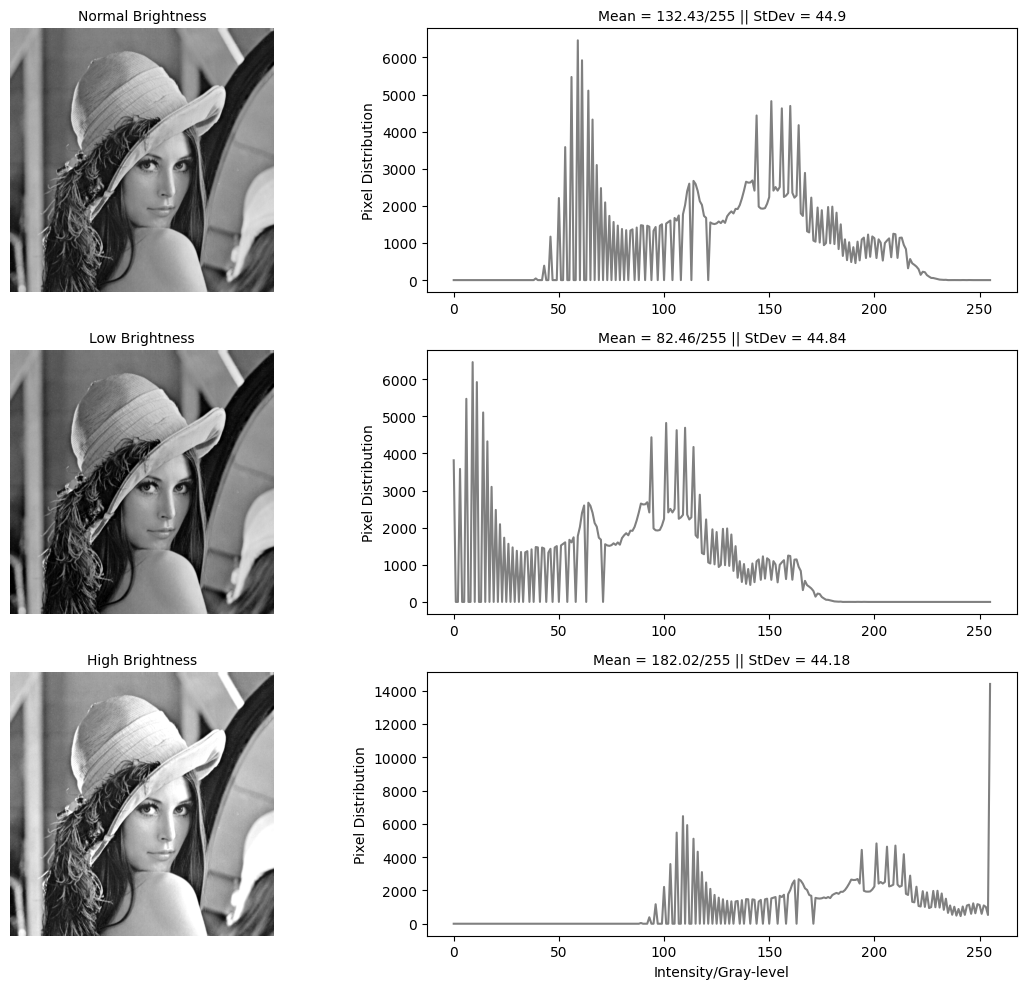

In [ ]:
grayhist_fig = plt.figure(figsize=(12, 10)) # figsize(width/horizontally, height/vertically)
for i in range(len(grayhist_img)):
    x = grayhist_fig.add_subplot(3, 2, i+1) # position index always starts from 1, thus i+1
    if i % 2 == 0:
        plot_image(grayhist_img[i], title=histname[int(i/2)])
    else:
        plt.plot(grayhist_img[i], color="gray")
        plt.title("Mean = {}/255 || StDev = {}".format(
            round(cv2.meanStdDev(grayhist_img[int(i-1)])[0][0][0], 2), # the mean
            round(cv2.meanStdDev(grayhist_img[int(i-1)])[1][0][0], 2) # the standard deviation
            ), fontsize=10
        )
        if i == 5: # print x-label only in the last histogram plot
            plt.xlabel("Intensity/Gray-level")
        plt.ylabel("Pixel Distribution") # print y-label in all histogram plots
plt.tight_layout() # margin adjusted